In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/dataset/time series/airline_passengers.csv")

In [ ]:
passanger=pd.read_csv("/content/drive/MyDrive/dataset/time series/airline_passengers.csv")

In [ ]:
data.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


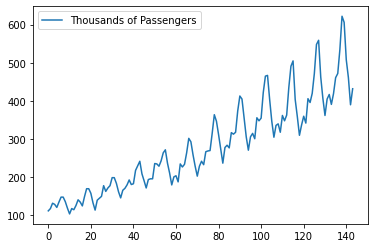

In [ ]:
data.plot()

In [ ]:
data['pass']=data['Thousands of Passengers'].ewm(span=5).mean()

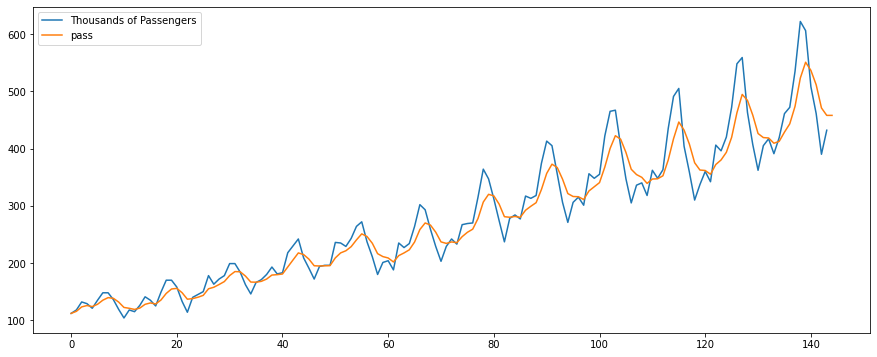

In [ ]:
data[['Thousands of Passengers','pass']].plot(figsize=(15,6))

In [ ]:
data['pass_2']=data['Thousands of Passengers'].ewm(alpha=0.6,adjust=False).mean()

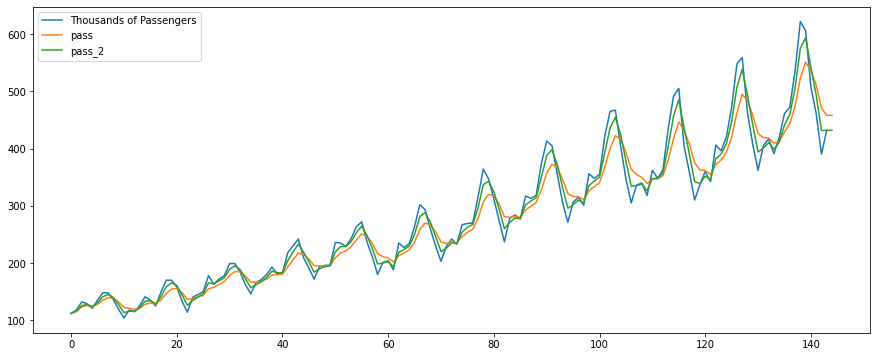

In [ ]:
data[['Thousands of Passengers','pass','pass_2']].plot(figsize=(15,6))

In [ ]:
passanger=passanger.dropna()

In [ ]:
passanger.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [ ]:
passanger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [ ]:
## converting oject into datetime
passanger['Month']=pd.to_datetime(passanger['Month'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
passanger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [ ]:
passanger.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [ ]:
passanger.set_index('Month',inplace=True)
## converting month colum into index

In [ ]:
passanger.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


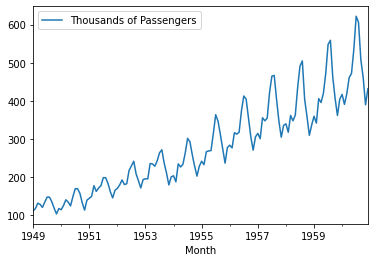

In [ ]:
passanger.plot()

In [ ]:
### checking the data is stationary or nat doing a test

Dkifuller  test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test(series):
  result=adfuller(series)
  print('ADF-value:{}'.format(result[0]))
  print('p-value:{}'.format(result[1]))
  if result[1]<=0.05:
    print('rejecting null hypothesis, data is stationary and have no unit root')
  else:
    print('accept null hypothesis ,data is not stationary and have  unit root')

In [ ]:
test(passanger['Thousands of Passengers'])

ADF-value:0.8153688792060472
p-value:0.991880243437641
accept null hypothesis ,data is not stationary and have  unit root


In [ ]:
## making the data stationary by differencing

In [ ]:
passanger['Thousands of Passengers_1']=passanger['Thousands of Passengers']-passanger['Thousands of Passengers'].shift(1)

In [ ]:
passanger.head()

,Thousands of Passengers,Thousands of Passengers_1
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [ ]:
## doing test to check data get stationary or not

In [ ]:
test(passanger['Thousands of Passengers_1'].dropna())

ADF-value:-2.8292668241700056
p-value:0.054213290283824704
accept null hypothesis ,data is not stationary and have  unit root


In [ ]:
passanger['Thousands of Passengers_2']=passanger['Thousands of Passengers_1']-passanger['Thousands of Passengers_1'].shift(1)

In [ ]:
passanger.head()

,Thousands of Passengers,Thousands of Passengers_1,Thousands of Passengers_2
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [ ]:
test(passanger['Thousands of Passengers_2'].dropna())

ADF-value:-16.384231542468495
p-value:2.7328918500143186e-29
rejecting null hypothesis, data is stationary and have no unit root


In [ ]:
## when ever data is sessional do differencing for 12 month

In [ ]:
passanger['Thousands of Passengers_12']=passanger['Thousands of Passengers']-passanger['Thousands of Passengers'].shift(12)

In [ ]:
test(passanger['Thousands of Passengers_12'].dropna())

ADF-value:-3.383020726492481
p-value:0.011551493085514952
rejecting null hypothesis, data is stationary and have no unit root


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

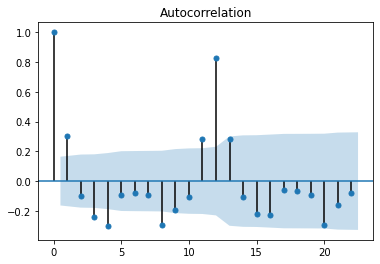

In [ ]:
acf_1=plot_acf(passanger['Thousands of Passengers_1'].dropna())

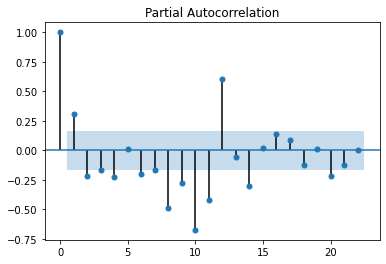

In [ ]:
pacf_1=plot_pacf(passanger['Thousands of Passengers_1'].dropna())

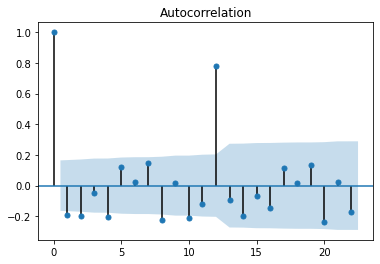

In [ ]:
acf_2=plot_acf(passanger['Thousands of Passengers_2'].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


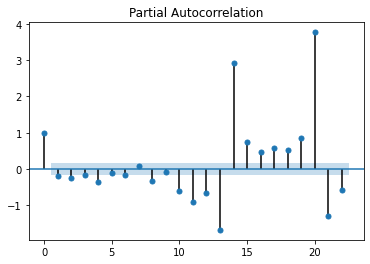

In [ ]:
pacf_2=plot_pacf(passanger['Thousands of Passengers_2'].dropna())

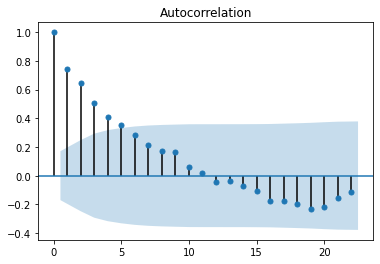

In [ ]:
acf_12=plot_acf(passanger['Thousands of Passengers_12'].dropna())

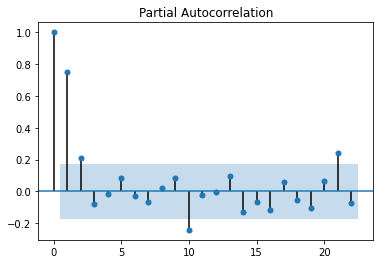

In [ ]:
pacf_12=plot_pacf(passanger['Thousands of Passengers_12'].dropna())

In [ ]:
from datetime import datetime,timedelta

In [ ]:
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [ ]:
train_dataset_end

datetime.datetime(1955, 12, 1, 0, 0)

In [ ]:
test_dataset_end

datetime.datetime(1960, 12, 1, 0, 0)

In [ ]:
train=passanger[:train_dataset_end]

In [ ]:
train

,Thousands of Passengers,Thousands of Passengers_1,Thousands of Passengers_2,Thousands of Passengers_12
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [ ]:
test=passanger[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
test

,Thousands of Passengers,Thousands of Passengers_1,Thousands of Passengers_2,Thousands of Passengers_12
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [ ]:
pred_start_date=test.index[0]
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [ ]:
pred_end_date=test.index[-1]
pred_end_date

Timestamp('1960-12-01 00:00:00')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_ARIMA=ARIMA(train['Thousands of Passengers'],order=(10,2,0))

In [ ]:
model_ARIMA_fit=model_ARIMA.fit()

In [ ]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Thu, 24 Nov 2022   AIC                            738.477
Time:                                10:33:32   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [ ]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test['Thousands of Passengers']-pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
residuals

Month
1956-01-01    302.695968
1956-02-01    289.830814
1956-03-01    319.329670
1956-04-01    328.562175
1956-05-01    298.689307
1956-06-01    354.352062
1956-07-01    426.271470
1956-08-01    441.529638
1956-09-01    350.001340
1956-10-01    315.913214
1956-11-01    242.711491
1956-12-01    281.647790
1957-01-01    333.119981
1957-02-01    304.741485
1957-03-01    367.652378
1957-04-01    343.198158
1957-05-01    343.325720
1957-06-01    413.019341
1957-07-01    483.932109
1957-08-01    477.557322
1957-09-01    403.265275
1957-10-01    346.226362
1957-11-01    281.802342
1957-12-01    337.112070
1958-01-01    347.244820
1958-02-01    325.413864
1958-03-01    364.318087
1958-04-01    341.830102
1958-05-01    355.290646
1958-06-01    435.056486
1958-07-01    504.184604
1958-08-01    505.771349
1958-09-01    405.976038
1958-10-01    350.193217
1958-11-01    301.548547
1958-12-01    341.117859
1959-01-01    364.677818
1959-02-01    347.031468
1959-03-01    403.339730
1959-04-01    392.1

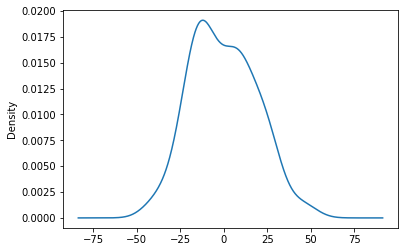

In [ ]:
model_ARIMA_fit.resid.plot(kind='kde')

In [ ]:
test['predicted_arima']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


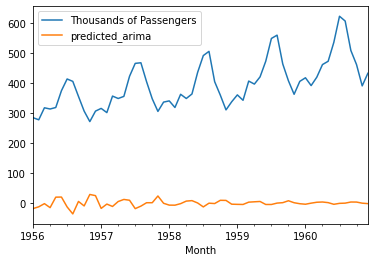

In [ ]:
test[['Thousands of Passengers','predicted_arima']].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_sarimax=SARIMAX(train['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_sarimax_fit=model_sarimax.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
model_sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 24 Nov 2022   AIC                            548.479
Time:                                     10:52:37   BIC                            568.969
Sample:                                 01-01-1949   HQIC                           556.636
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5924      0.950      0.624      0.533      -1.269       2.454
ar.L2          0.8319      0.232      3.593      0.000       0.378       1.286
ar.L3         -0.4473      0.905     -0.495      0.621      -2.220       1.326
ma.L1          0.1898      1.190      0.160      0.873      -2.142       2.521
ma.L2         -0.5302      1.285     -0.413      0.680      -3.049       1.989
ma.L3         -0.1004      0.391     -0.257      0.797      -0.867       0.666
ma.L4         -0.1288      0.347     -0.371      0.711      -0.809       0.552
ma.L5          0.2455      0.365      0.673      0.501      -0.469       0.960
sigma2        87.7546     83.800      1.047      0.295     -76.491     252.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.04   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_sarima=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals_sarima=test['Thousands of Passengers']-pred_sarima


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
residuals_sarima

Month
1956-01-01    302.695968
1956-02-01    289.830814
1956-03-01    319.329670
1956-04-01    328.562175
1956-05-01    298.689307
1956-06-01    354.352062
1956-07-01    426.271470
1956-08-01    441.529638
1956-09-01    350.001340
1956-10-01    315.913214
1956-11-01    242.711491
1956-12-01    281.647790
1957-01-01    333.119981
1957-02-01    304.741485
1957-03-01    367.652378
1957-04-01    343.198158
1957-05-01    343.325720
1957-06-01    413.019341
1957-07-01    483.932109
1957-08-01    477.557322
1957-09-01    403.265275
1957-10-01    346.226362
1957-11-01    281.802342
1957-12-01    337.112070
1958-01-01    347.244820
1958-02-01    325.413864
1958-03-01    364.318087
1958-04-01    341.830102
1958-05-01    355.290646
1958-06-01    435.056486
1958-07-01    504.184604
1958-08-01    505.771349
1958-09-01    405.976038
1958-10-01    350.193217
1958-11-01    301.548547
1958-12-01    341.117859
1959-01-01    364.677818
1959-02-01    347.031468
1959-03-01    403.339730
1959-04-01    392.1

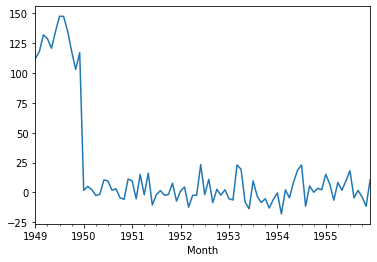

In [ ]:
model_sarimax_fit.resid.plot()

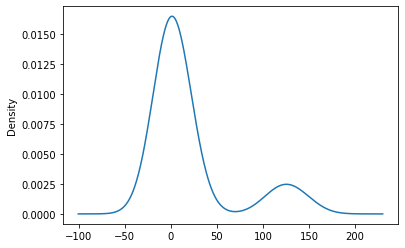

In [ ]:
model_sarimax_fit.resid.plot(kind='kde')

In [ ]:
test['predicted_sarimax']=pred_sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


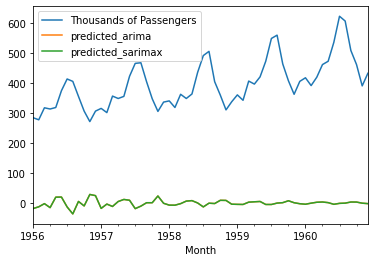

In [ ]:
test[['Thousands of Passengers','predicted_arima','predicted_sarimax']].plot()